캐글 자료 다운로드 받기

In [30]:
# https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview

In [7]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 99% 805M/814M [00:06<00:00, 151MB/s]
100% 814M/814M [00:06<00:00, 124MB/s]


드라이브에 있는 zip 풀기

In [8]:
!unzip -q dogs-vs-cats-redux-kernels-edition.zip -d .

In [9]:
!unzip -q train.zip -d .

폴더에 있는 데이터 개수 확인

In [10]:
import os

print(len(os.listdir('/content/train')))

25000


이미지 카테고리 별로 분류

In [12]:
'''
파일명을 반복해서 출력하는 작업
'''

import os

# print(len(os.listdir('/content/train'/)))

for i in os.listdir('/content/train/'):
  print(i)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
cat.10346.jpg
dog.4683.jpg
dog.440.jpg
cat.11786.jpg
dog.9678.jpg
dog.11046.jpg
cat.2507.jpg
cat.8062.jpg
cat.4522.jpg
dog.9976.jpg
dog.10291.jpg
dog.6714.jpg
dog.11301.jpg
dog.6272.jpg
dog.11792.jpg
dog.5463.jpg
cat.9046.jpg
cat.10717.jpg
cat.3944.jpg
dog.5548.jpg
cat.7815.jpg
dog.1935.jpg
cat.9786.jpg
dog.12055.jpg
dog.4123.jpg
cat.10824.jpg
dog.4496.jpg
dog.8719.jpg
cat.11717.jpg
cat.3875.jpg
cat.8477.jpg
dog.9730.jpg
cat.11074.jpg
dog.319.jpg
cat.6678.jpg
dog.9863.jpg
dog.9230.jpg
cat.4527.jpg
cat.11097.jpg
cat.7115.jpg
cat.6788.jpg
dog.6116.jpg
dog.8411.jpg
cat.9926.jpg
dog.6096.jpg
dog.9738.jpg
dog.4661.jpg
cat.7327.jpg
dog.5721.jpg
cat.7605.jpg
cat.9621.jpg
cat.3993.jpg
dog.5706.jpg
cat.3279.jpg
dog.11415.jpg
cat.4421.jpg
dog.7326.jpg
dog.8375.jpg
dog.4570.jpg
dog.12362.jpg
cat.4072.jpg
dog.7930.jpg
cat.6379.jpg
dog.10723.jpg
cat.9620.jpg
dog.11793.jpg
cat.9468.jpg
cat.3679.jpg
cat.9177.jpg
dog.221.jpg
cat.8744.jpg
cat.9859.jpg
dog.5613.jpg
do

In [14]:
'''
파일명에 따라 카테고리 분류하기
'''

import os
import shutil

# print(len(os.listdir('/content/train')))

for i in os.listdir('/content/train/'):
  if 'cat' in i:
    shutil.copyfile('/content/train/' + i, '/content/dataset/cat/' + i)
  if 'dog' in i:
    shutil.copyfile('/content/train/' + i, '/content/dataset/dog/' + i)

print(len(os.listdir('/content/dataset/cat/')))


12500


이미지 분류 모델 만들기 전 작업

In [17]:
import tensorflow as tf

# 훈련 데이터셋 생성
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    # 이미지 파일이 저장된 폴더 경로
    '/content/dataset/',
    # 모든 이미지를 64x64 크기로 조정
    image_size=(64, 64),
    # 한 번에 처리할 이미지 수 (batch size)
    # batch: 한 번에 처리하는 데이터 묶음. 여기서는 64개의 이미지를 하나의 묶음으로 처리
    batch_size=64,
    # 데이터 분할 과정:
    # 1. validation_split=0.2로 전체 데이터의 20%를 검증용으로 예약
    # 2. subset='training'으로 나머지 80%를 훈련 데이터로 선택
    subset='training',
    validation_split=0.2,
    # 데이터 분할 시 일관성 유지를 위한 난수 시드
    # 같은 시드를 사용하면 항상 같은 방식으로 데이터가 분할됨
    seed=12345
)

# 검증 데이터셋 생성
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/',
    image_size=(64, 64),
    batch_size=64,
    # 데이터 분할 과정:
    # 1. validation_split=0.2로 전체 데이터의 20%를 검증용으로 예약 (위와 동일)
    # 2. subset='validation'으로 예약된 20%를 검증 데이터로 선택
    subset='validation',
    validation_split=0.2,
    seed=12345
)
# TensorSpec() ~ 을 보면, train_ds에 이미지 데이터와 정답 데이터가 있다는 걸 알 수 있다.
print(train_ds)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


이미지 데이터가 숫자로 잘 변환 됐는지 확인하기

In [18]:
import tensorflow as tf

# 훈련 데이터셋 생성
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    # 이미지 파일이 저장된 폴더 경로
    '/content/dataset/',
    # 모든 이미지를 64x64 크기로 조정
    image_size=(64, 64),
    # 한 번에 처리할 이미지 수 (batch size)
    # batch: 한 번에 처리하는 데이터 묶음. 여기서는 64개의 이미지를 하나의 묶음으로 처리
    batch_size=64,
    # 데이터 분할 과정:
    # 1. validation_split=0.2로 전체 데이터의 20%를 검증용으로 예약
    # 2. subset='training'으로 나머지 80%를 훈련 데이터로 선택
    subset='training',
    validation_split=0.2,
    # 데이터 분할 시 일관성 유지를 위한 난수 시드
    # 같은 시드를 사용하면 항상 같은 방식으로 데이터가 분할됨
    seed=12345
)

# 검증 데이터셋 생성
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/',
    image_size=(64, 64),
    batch_size=64,
    # 데이터 분할 과정:
    # 1. validation_split=0.2로 전체 데이터의 20%를 검증용으로 예약 (위와 동일)
    # 2. subset='validation'으로 예약된 20%를 검증 데이터로 선택
    subset='validation',
    validation_split=0.2,
    seed=12345
)

# train_ds.take(1) 의미
  # train_ds에서 만든 배치 데이터 중 한 개를 가져 오겠다는 의미
# 반환 받는 게 i, 정답 두 개인 이유
  # train_ds.take는 (이미지, 정답)으로 구성 되어 있기 때문에.
for i, 정답 in train_ds.take(1):
  print(i)
  print(정답)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
tf.Tensor(
[[[[133.38672    152.38672    132.61328   ]
   [123.40234    140.40234    130.40234   ]
   [132.16406    151.16406    129.16406   ]
   ...
   [210.5        218.63281    220.23438   ]
   [208.5        218.5        219.83984   ]
   [206.88672    217.88672    213.11328   ]]

  [[132.22656    151.22656    132.22656   ]
   [127.60156    145.60156    131.96094   ]
   [137.16406    156.16406    137.09766   ]
   ...
   [212.23438    221.23438    220.23438   ]
   [210.         221.         216.        ]
   [212.70703    222.70703    223.2539    ]]

  [[135.84766    153.84766    137.84766   ]
   [126.12109    145.1211     125.140625  ]
   [148.6914     166.6914     150.82422   ]
   ...
   [216.5664     225.5664     224.5664    ]
   [217.28125    228.28125    223.28125   ]
   [234.61328    244.61328    245.16016   ]]

  ...

  [[217.61328 

이미지 데이터 직접 확인하기

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
tf.Tensor(
[[[[133.38672    152.38672    132.61328   ]
   [123.40234    140.40234    130.40234   ]
   [132.16406    151.16406    129.16406   ]
   ...
   [210.5        218.63281    220.23438   ]
   [208.5        218.5        219.83984   ]
   [206.88672    217.88672    213.11328   ]]

  [[132.22656    151.22656    132.22656   ]
   [127.60156    145.60156    131.96094   ]
   [137.16406    156.16406    137.09766   ]
   ...
   [212.23438    221.23438    220.23438   ]
   [210.         221.         216.        ]
   [212.70703    222.70703    223.2539    ]]

  [[135.84766    153.84766    137.84766   ]
   [126.12109    145.1211     125.140625  ]
   [148.6914     166.6914     150.82422   ]
   ...
   [216.5664     225.5664     224.5664    ]
   [217.28125    228.28125    223.28125   ]
   [234.61328    244.61328    245.16016   ]]

  ...

  [[217.61328 

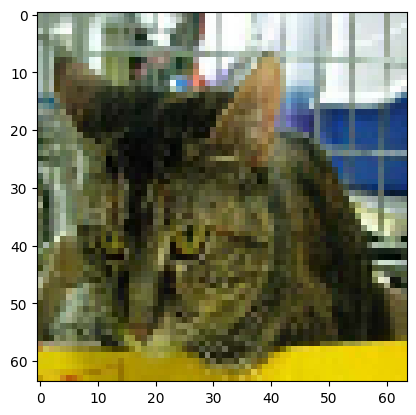

In [19]:
import tensorflow as tf

# 훈련 데이터셋 생성
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    # 이미지 파일이 저장된 폴더 경로
    '/content/dataset/',
    # 모든 이미지를 64x64 크기로 조정
    image_size=(64, 64),
    # 한 번에 처리할 이미지 수 (batch size)
    # batch: 한 번에 처리하는 데이터 묶음. 여기서는 64개의 이미지를 하나의 묶음으로 처리
    batch_size=64,
    # 데이터 분할 과정:
    # 1. validation_split=0.2로 전체 데이터의 20%를 검증용으로 예약
    # 2. subset='training'으로 나머지 80%를 훈련 데이터로 선택
    subset='training',
    validation_split=0.2,
    # 데이터 분할 시 일관성 유지를 위한 난수 시드
    # 같은 시드를 사용하면 항상 같은 방식으로 데이터가 분할됨
    seed=12345
)

# 검증 데이터셋 생성
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/',
    image_size=(64, 64),
    batch_size=64,
    # 데이터 분할 과정:
    # 1. validation_split=0.2로 전체 데이터의 20%를 검증용으로 예약 (위와 동일)
    # 2. subset='validation'으로 예약된 20%를 검증 데이터로 선택
    subset='validation',
    validation_split=0.2,
    seed=12345
)

import matplotlib.pyplot as plt

for i, 정답 in train_ds.take(1):
  print(i)
  print(정답)
  # .numpy()를 하는 이유
    # plt로 imshow 하기 위해서는 numpy로 바꿔줘야 함
      # 바꾸기 전에는 i가 tensor 자료형이기 때문에 부적합
  # .astype('uint8') 하는 이유
    # 이미지 데이터는 .float32 형태임.
    #   .float32는 plt로 정상적으로 이미지를 확인하기 위해서.
    #     따라서 uint8을 적어서 이미지 데이터를 0~255 범위를 갖는 정수형 데이터로 변환 하는 것.
  plt.imshow(i[0].numpy().astype('uint8'))
  plt.show()

이미지 분류 모델 만들기 (데이터 전처리 전 // 학습 속도 느림)

In [21]:
'''
이미지 분류 모델 학습 처리 속도가 느리다.

처리 속도를 개선하기 위해서는 데이터 전처리 해야 한다.
이미지 코드인 0 ~ 255 -> 0~1로 압축

--
1.
Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (64, 64, 3))

이미지에서 특징을 추려내 32개의 필터를 만든다.
필터 크기는 3x3이다.
패딩은 손실 될 수 있는 이미지를 보호하는 역할을 한다.
relu는 음수를 양수로 변환한다. 이미지는 0~255 범위를 갖기 때문에, relu를 적용한다.

2.
Dropout(0.2)은 바로 위에 있는 필터의 개수를 무자구이로 비활성화 하는 역할을 한다. (20% 비활성화)

이는 오버피팅(과적합)을 방지하기 위함이다.

3.
손실함수는 분류 문제이기 때문에 binary_crossentropy를 사용한다.
'''
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(train_ds, validation_data = val_ds, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,142,081 (4.36 MB)

 Trainable params: 1,142,081 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
 18/313 ━━━━━━━━━━━━━━━━━━━━ 2:40 545ms/step - accuracy: 0.5368 - loss: 43.3974

KeyboardInterrupt: 

이미지 데이터 전처리 하기

In [25]:
'''
def 전처리함수(i, 정답):
  # 이미지 코드가 255번까지 있기 때문에, 0~1범위로 이미지 코드를 압축하기 위해서는 255로 나누어야 한다.
  # float32를 인자로 적어줌으로써 데이터타입을 강제한다.
  i = tf.cast(i/255.0, tf.float32)
  return i, 정답

# map()을 이용해서 모든 데이터에 전처리함수를 적용한다.
train_ds = train_ds.map(전처리함수)
val_ds = val_ds.map(전처리함수)



'''

import tensorflow as tf

# 훈련 데이터셋 생성
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    # 이미지 파일이 저장된 폴더 경로
    '/content/dataset/',
    # 모든 이미지를 64x64 크기로 조정
    image_size=(64, 64),
    # 한 번에 처리할 이미지 수 (batch size)
    # batch: 한 번에 처리하는 데이터 묶음. 여기서는 64개의 이미지를 하나의 묶음으로 처리
    batch_size=64,
    # 데이터 분할 과정:
    # 1. validation_split=0.2로 전체 데이터의 20%를 검증용으로 예약
    # 2. subset='training'으로 나머지 80%를 훈련 데이터로 선택
    subset='training',
    validation_split=0.2,
    # 데이터 분할 시 일관성 유지를 위한 난수 시드
    # 같은 시드를 사용하면 항상 같은 방식으로 데이터가 분할됨
    seed=12345
)

# 검증 데이터셋 생성
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/',
    image_size=(64, 64),
    batch_size=64,
    # 데이터 분할 과정:
    # 1. validation_split=0.2로 전체 데이터의 20%를 검증용으로 예약 (위와 동일)
    # 2. subset='validation'으로 예약된 20%를 검증 데이터로 선택
    subset='validation',
    validation_split=0.2,
    seed=12345
)

def 전처리함수(i, 정답):
  i = tf.cast(i/255.0, tf.float32)
  return i, 정답

train_ds = train_ds.map(전처리함수)
val_ds = val_ds.map(전처리함수)


import matplotlib.pyplot as plt

for i, 정답 in train_ds.take(1):
  print(i)
  print(정답)
  # .numpy()를 하는 이유
    # plt로 imshow 하기 위해서는 numpy로 바꿔줘야 함
      # 바꾸기 전에는 i가 tensor 자료형이기 때문에 부적합
  # .astype('uint8') 하는 이유
    # 이미지 데이터는 .float32 형태임.
    #   .float32는 plt로 정상적으로 이미지를 확인하기 위해서.
    #     따라서 uint8을 적어서 이미지 데이터를 0~255 범위를 갖는 정수형 데이터로 변환 하는 것.
  # plt.imshow(i[0].numpy().astype('uint8'))
  # plt.show()

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
tf.Tensor(
[[[[0.5230852  0.597595   0.5200521 ]
   [0.48393077 0.5505974  0.51138175]
   [0.51829046 0.59280026 0.50652575]
   ...
   [0.8254902  0.85738355 0.8636642 ]
   [0.81764704 0.8568627  0.86211705]
   [0.8113205  0.85445774 0.83573836]]

  [[0.51853555 0.59304535 0.51853555]
   [0.5003983  0.5709865  0.51749384]
   [0.5378983  0.6124081  0.5376379 ]
   ...
   [0.83229166 0.8675858  0.8636642 ]
   [0.8235294  0.8666667  0.84705883]
   [0.83414525 0.87336093 0.8755055 ]]

  [[0.5327359  0.6033241  0.540579  ]
   [0.49459252 0.56910235 0.49074754]
   [0.58310354 0.65369177 0.5914675 ]
   ...
   [0.84928    0.8845741  0.88065255]
   [0.8520833  0.8952206  0.87561274]
   [0.9200521  0.9592678  0.9614124 ]]

  ...

  [[0.8533854  0.7867187  0.        ]
   [0.8523897  0.78180146 0.        ]
   [0.85490197 0.7823529  0.00836397]
   ...
 

이미지 모델 학습 (데이터 전처리 후)

In [27]:
import tensorflow as tf

# 훈련 데이터셋 생성
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    # 이미지 파일이 저장된 폴더 경로
    '/content/dataset/',
    # 모든 이미지를 64x64 크기로 조정
    image_size=(64, 64),
    # 한 번에 처리할 이미지 수 (batch size)
    # batch: 한 번에 처리하는 데이터 묶음. 여기서는 64개의 이미지를 하나의 묶음으로 처리
    batch_size=64,
    # 데이터 분할 과정:
    # 1. validation_split=0.2로 전체 데이터의 20%를 검증용으로 예약
    # 2. subset='training'으로 나머지 80%를 훈련 데이터로 선택
    subset='training',
    validation_split=0.2,
    # 데이터 분할 시 일관성 유지를 위한 난수 시드
    # 같은 시드를 사용하면 항상 같은 방식으로 데이터가 분할됨
    seed=12345
)

# 검증 데이터셋 생성
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/',
    image_size=(64, 64),
    batch_size=64,
    # 데이터 분할 과정:
    # 1. validation_split=0.2로 전체 데이터의 20%를 검증용으로 예약 (위와 동일)
    # 2. subset='validation'으로 예약된 20%를 검증 데이터로 선택
    subset='validation',
    validation_split=0.2,
    seed=12345
)

def 전처리함수(i, 정답):
  i = tf.cast(i/255.0, tf.float32)
  return i, 정답

train_ds = train_ds.map(전처리함수)
val_ds = val_ds.map(전처리함수)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(train_ds, validation_data = val_ds, epochs=5)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,142,081 (4.36 MB)

 Trainable params: 1,142,081 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 244s 775ms/step - accuracy: 0.5876 - loss: 0.6655 - val_accuracy: 0.7482 - val_loss: 0.5149
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 256s 753ms/step - accuracy: 0.7432 - loss: 0.5148 - val_accuracy: 0.7880 - val_loss: 0.4523
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 262s 754ms/step - accuracy: 0.7921 - loss: 0.4498 - val_accuracy: 0.7998 - val_loss: 0.4187
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 229s 731ms/step - accuracy: 0.8182 - loss: 0.3948 - val_accuracy: 0.8162 - val_loss: 0.4043
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 264s 737ms/step - accuracy: 0.8458 - loss: 0.3471 - val_accuracy: 0.7890 - val_loss: 0.4627
